In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from keras.layers import Bidirectional
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import datetime
from numpy import hstack, vstack
from numpy import array
from sklearn.linear_model import SGDClassifier as SGD
from keras.models import load_model

In [12]:
#obtain list of dates
directory = "Historical/Golden State Warriors"
list_dates = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        list_dates.append(filename)

In [13]:
testing = pd.DataFrame()

for l in list_dates:
    data = pd.read_csv(f'{directory}/{l}')
    
    testing = pd.concat([testing, data])
    
    

In [29]:
st = pd.read_csv('2022.csv')

In [38]:
st = st.replace('Golden State Warriors', 'Portland Trail Blazers')

In [39]:
st['Opponent'] = st['Opp']

In [43]:
st['Date'] = st['Unnamed: 0']

In [28]:
testing

,Unnamed: 0,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,AST,STL,BLK,TO,PF,PTS,+/-,Date,Opponent,Score
0,Andrew Wiggins,34:00,10.0,16.0,62.5,3.0,5.0,60.0,2.0,2.0,...,2.0,1.0,0.0,1.0,3.0,25.0,21.0,11/26/2021,Portland Trail Blazers,37.25
1,Draymond Green,34:18,5.0,8.0,62.5,0.0,1.0,0.0,2.0,3.0,...,12.0,2.0,3.0,6.0,3.0,12.0,17.0,11/26/2021,Portland Trail Blazers,47.00
2,Kevon Looney,20:03,6.0,7.0,85.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,12.0,-3.0,11/26/2021,Portland Trail Blazers,20.75
3,Jordan Poole,34:35,5.0,12.0,41.7,2.0,6.0,33.3,2.0,2.0,...,5.0,0.0,0.0,1.0,3.0,14.0,23.0,11/26/2021,Portland Trail Blazers,24.50
4,Stephen Curry,38:04,12.0,25.0,48.0,6.0,15.0,40.0,2.0,3.0,...,8.0,1.0,0.0,3.0,2.0,32.0,18.0,11/26/2021,Portland Trail Blazers,56.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Damion Lee,15:43,5.0,8.0,62.5,3.0,4.0,75.0,2.0,2.0,...,0.0,1.0,0.0,1.0,2.0,15.0,4.0,11/03/2021,Charlotte Hornets,24.25
10,Juan Toscano-Anderson,13:57,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,11/03/2021,Charlotte Hornets,3.50
11,Moses Moody,1:51,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,5.0,11/03/2021,Charlotte Hornets,4.75
12,Jonathan Kuminga,1:51,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,11/03/2021,Charlotte Hornets,0.00


In [44]:
result = pd.merge(testing, st, on=['Date', 'Opponent'])

In [45]:
result

,Unnamed: 0_x,MIN,FGM_x,FGA_x,FG%_x,3PM_x,3PA_x,3P%_x,FTM_x,FTA_x,...,FT%_y,OREB_y,DREB_y,REB_y,AST_y,STL_y,BLK_y,TOV,PF_y,+/-_y
0,Andrew Wiggins,34:00,10.0,16.0,62.5,3.0,5.0,60.0,2.0,2.0,...,78.3,7,30,37,23,7,2,10,13,-15
1,Draymond Green,34:18,5.0,8.0,62.5,0.0,1.0,0.0,2.0,3.0,...,78.3,7,30,37,23,7,2,10,13,-15
2,Kevon Looney,20:03,6.0,7.0,85.7,0.0,0.0,0.0,0.0,0.0,...,78.3,7,30,37,23,7,2,10,13,-15
3,Jordan Poole,34:35,5.0,12.0,41.7,2.0,6.0,33.3,2.0,2.0,...,78.3,7,30,37,23,7,2,10,13,-15
4,Stephen Curry,38:04,12.0,25.0,48.0,6.0,15.0,40.0,2.0,3.0,...,78.3,7,30,37,23,7,2,10,13,-15
5,Otto Porter Jr.,21:14,1.0,4.0,25.0,0.0,3.0,0.0,0.0,0.0,...,78.3,7,30,37,23,7,2,10,13,-15
6,Gary Payton II,11:44,3.0,3.0,100.0,0.0,0.0,0.0,1.0,2.0,...,78.3,7,30,37,23,7,2,10,13,-15
7,Juan Toscano-Anderson,23:12,3.0,5.0,60.0,0.0,2.0,0.0,2.0,2.0,...,78.3,7,30,37,23,7,2,10,13,-15
8,Nemanja Bjelica,10:18,1.0,3.0,33.3,0.0,2.0,0.0,1.0,2.0,...,78.3,7,30,37,23,7,2,10,13,-15
9,Chris Chiozza,12:32,1.0,4.0,25.0,1.0,3.0,33.3,0.0,0.0,...,78.3,7,30,37,23,7,2,10,13,-15


In [14]:
data_df = testing.loc[testing['Unnamed: 0'] == 'Stephen Curry']
data_df.head()

,Unnamed: 0,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,AST,STL,BLK,TO,PF,PTS,+/-,Date,Opponent,Score
4,Stephen Curry,38:04,12.0,25.0,48.0,6.0,15.0,40.0,2.0,3.0,...,8.0,1.0,0.0,3.0,2.0,32.0,18.0,11/26/2021,Portland Trail Blazers,56.25
4,Stephen Curry,35:02,5.0,20.0,25.0,1.0,13.0,7.7,2.0,2.0,...,6.0,0.0,0.0,1.0,0.0,13.0,-5.0,01/23/2022,Utah Jazz,27.00
4,Stephen Curry,43:57,12.0,27.0,44.4,6.0,16.0,37.5,9.0,9.0,...,8.0,1.0,0.0,2.0,3.0,39.0,-4.0,01/20/2022,Indiana Pacers,61.25
4,Stephen Curry,38:56,6.0,21.0,28.6,4.0,13.0,30.8,6.0,8.0,...,12.0,1.0,1.0,2.0,3.0,22.0,2.0,01/21/2022,Houston Rockets,50.00
4,Stephen Curry,36:31,10.0,21.0,47.6,4.0,11.0,36.4,4.0,4.0,...,5.0,1.0,0.0,5.0,3.0,28.0,23.0,01/09/2022,Cleveland Cavaliers,43.25


<AxesSubplot:xlabel='Date'>

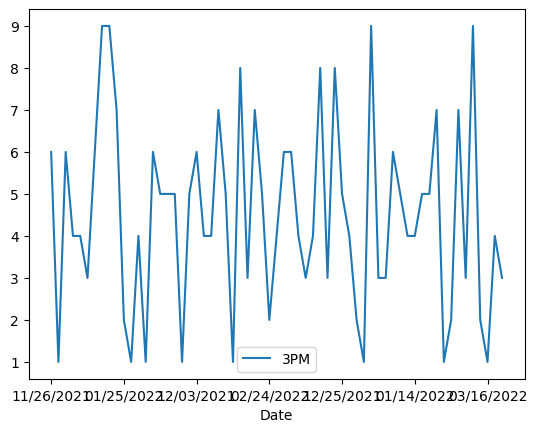

In [15]:
data_df.plot(x = 'Date', y='3PM')

<AxesSubplot:>

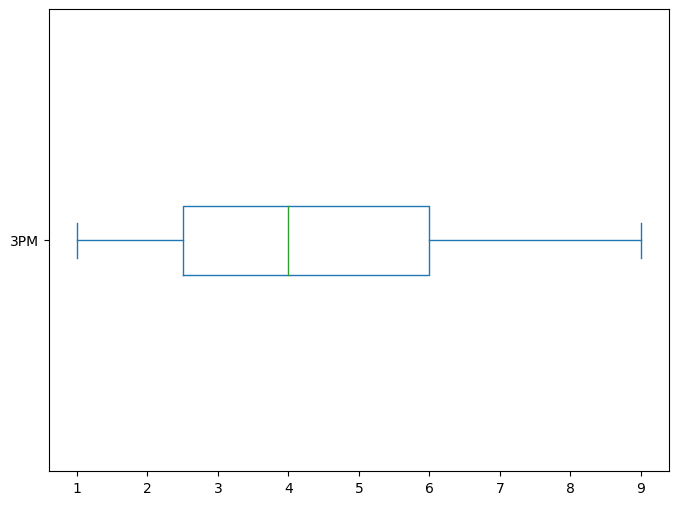

In [23]:
data_df.head(15)['3PM'].plot(kind='box', vert=False, figsize=(8, 6)) 

<AxesSubplot:>

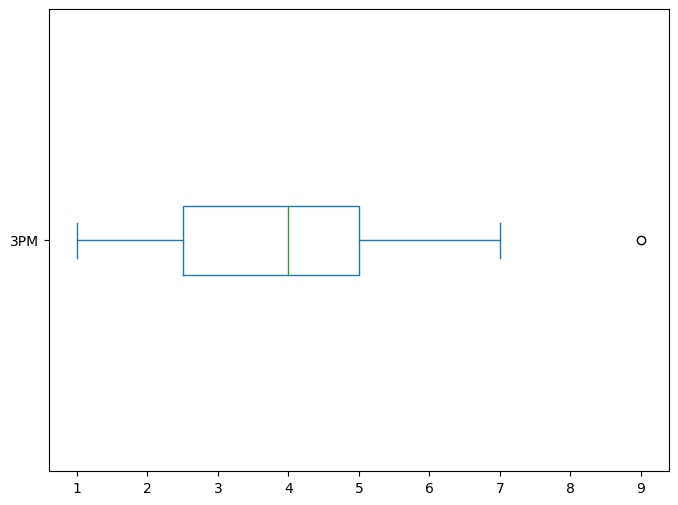

In [24]:
data_df.tail(15)['3PM'].plot(kind='box', vert=False, figsize=(8, 6)) 

<AxesSubplot:>

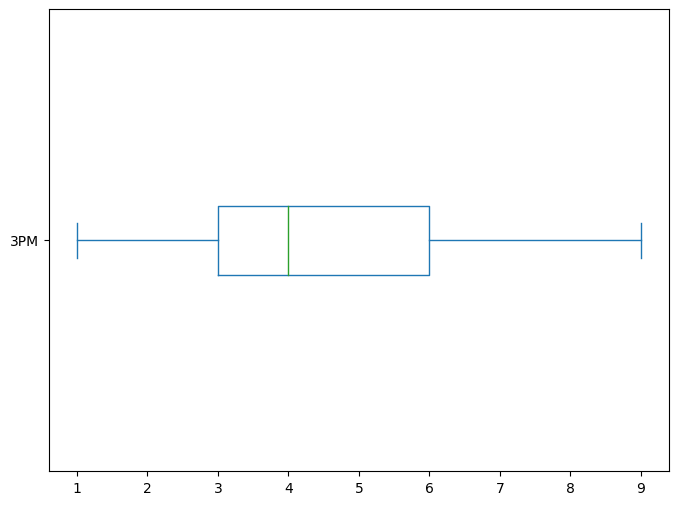

In [26]:
data_df['3PM'].plot(kind='box', vert=False, figsize=(8, 6)) 